# Sampling
This data was collected from [basketball-reference](http://www.basketball-reference.com) and [spotrac](http://www.spotrac.com).

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Don't change this cell; just run it. 
from gofer.ok import check

## 1. Dungeons and Dragons and Sampling

In [2]:
possible_rolls = np.arange(1,21,1)
roll_result = np.random.choice(possible_rolls)
modified_result = roll_result + 11
action_succeeded = modified_result > 15

# The next line just prints out your results in a nice way
# once you're done.  You can delete it if you want.
print("On a modified roll of {:d}, Alice's action {}.".format(modified_result, "succeeded" if action_succeeded else "failed"))

On a modified roll of 29, Alice's action succeeded.


In [3]:
rough_success_chance = 1
rough_success_chance

1

In [4]:
modifier = 11
num_observations = 7

def simulate_observations():
    """Produces an array of 7 simulated modified die rolls"""
    return np.random.choice(possible_rolls,num_observations) + modifier
observations = simulate_observations()
observations

array([27, 29, 24, 26, 19, 31, 28])

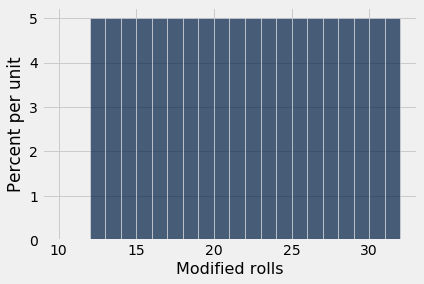

In [5]:
# We suggest using these bins.
roll_bins = np.arange(10, modifier+2+20, 1) #括号内第一个数是坐标min，中间数字是max，第三个是增长数）

roll = Table().with_column('Modified rolls',np.arange(1+modifier, 20+modifier+1))

roll.hist(bins = roll_bins)

In [6]:
min_estimate = min(observations)-1
min_estimate

18

In [7]:
def mean_based_estimator(nums):
    """Estimate the roll modifier based on observed modified rolls in the array nums."""
    return np.mean(nums)-10.5

# Here is an example call to your function.  It computes an estimate
# of the modifier from our 7 observations.
mean_based_estimate = mean_based_estimator(observations)
mean_based_estimate

15.785714285714285

## 2. Sampling Basketball Data

Run the cell below to load the player and salary data.

In [8]:
player_data = Table().read_table("player_data.csv")
salary_data = Table().read_table("salary_data.csv")
full_data = salary_data.join("PlayerName", player_data, "Name")
# The show method immediately displays the contents of a table. 
# This way, we can display the top of two tables using a single cell.
player_data.show(3)
salary_data.show(3)
full_data.show(3)

Name,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
James Harden,25,HOU,81,459,565,154,60,321,2217
Chris Paul,29,LAC,82,376,838,156,15,190,1564
Stephen Curry,26,GSW,80,341,619,163,16,249,1900


PlayerName,Salary
Kobe Bryant,23500000
Amar'e Stoudemire,23410988
Joe Johnson,23180790


PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
A.J. Price,62552,28,TOT,26,32,46,7,0,14,133
Aaron Brooks,1145685,30,CHI,82,166,261,54,15,157,954
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243


In [9]:
full_data.column("Salary").min()


14409

In [10]:
full_data.column("Salary").max()

23500000

In [11]:
full_data.column("Age").min()

19

In [12]:
full_data.column("Age").max()

38

Two histograms should be displayed below


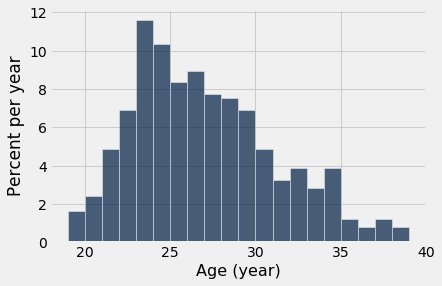

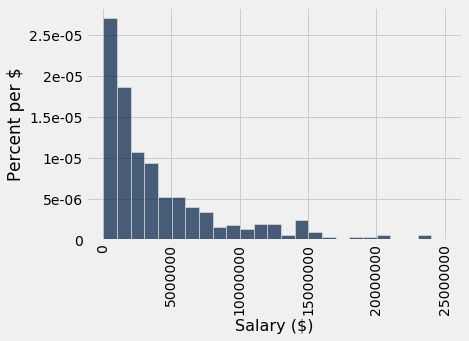

In [13]:
def histograms(t):
    ages = t.column('Age')
    salaries = t.column('Salary')
    age_bins = np.arange(min(ages),max(ages)+2,1)
    salary_bins = np.arange(min(salaries),max(salaries)+2000000,1000000)
    t.hist('Age', bins=age_bins, unit='year')
    t.hist('Salary', bins=salary_bins, unit='$')
    return age_bins # Keep this statement so that your work can be checked
    
histograms(full_data)
print('Two histograms should be displayed below')

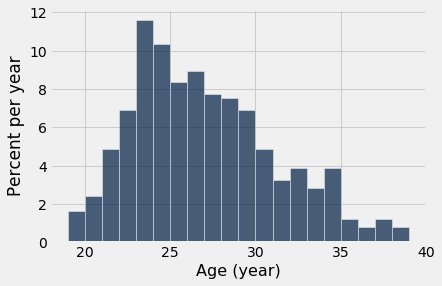

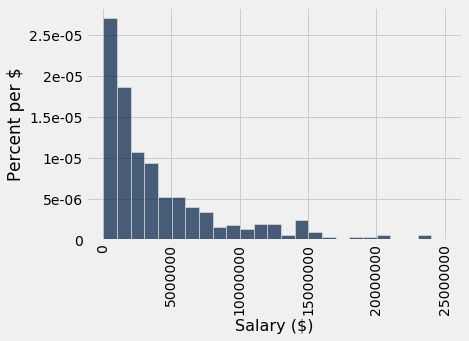

In [14]:
def compute_statistics(age_and_salary_data):
    histograms(age_and_salary_data)
    age = age_and_salary_data.column("Age")
    salary = age_and_salary_data.column("Salary")
    return make_array(np.mean(age), np.mean(salary))
    

full_stats = compute_statistics(full_data)

In [15]:
convenience_sample = full_data.where("Age", are.below(22))
convenience_sample

PlayerName,Salary,Age,Team,Games,Rebounds,Assists,Steals,Blocks,Turnovers,Points
Aaron Gordon,3992040,19,ORL,47,169,33,21,22,38,243
Alex Len,3649920,21,PHO,69,454,32,34,105,74,432
Andre Drummond,2568360,21,DET,82,1104,55,73,153,120,1130
Andrew Wiggins,5510640,19,MIN,82,374,170,86,50,177,1387
Anthony Bennett,5563920,21,MIN,57,216,48,27,16,36,298
Anthony Davis,5607240,21,NOP,68,696,149,100,200,95,1656
Archie Goodwin,1112280,20,PHO,41,74,44,18,9,48,231
Ben McLemore,3026280,21,SAC,82,241,140,77,19,138,996
Bradley Beal,4505280,21,WAS,63,241,194,76,18,123,962
Bruno Caboclo,1458360,19,TOR,8,2,0,0,1,4,10


array([2.03636364e+01, 2.38353382e+06])

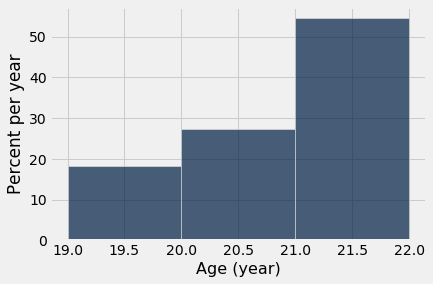

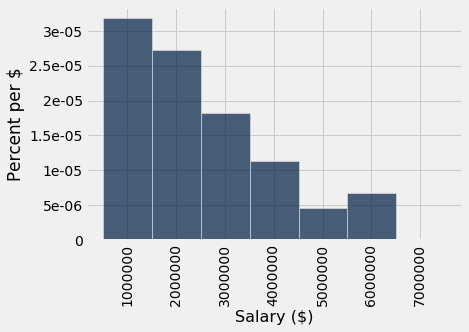

In [16]:
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

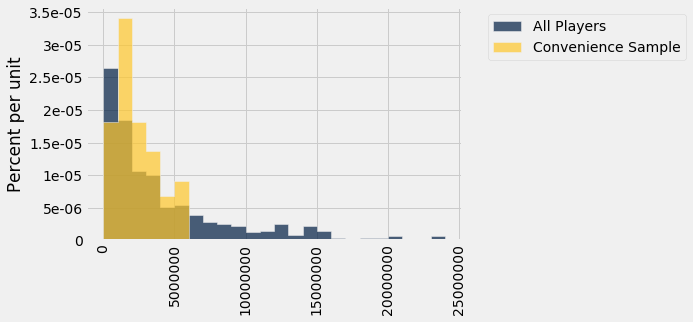

In [17]:
def compare_salaries(first, second, first_title, second_title):
    """Compare the salaries in two tables."""
    max_salary = max(np.append(first.column('Salary'), second.column('Salary')))
    bins = np.arange(0, max_salary+1e6+1, 1e6)
    first_binned = first.bin('Salary', bins=bins).relabeled(1, first_title)
    second_binned = second.bin('Salary', bins=bins).relabeled(1, second_title)
    first_binned.join('bin', second_binned).hist(bin_column='bin')

compare_salaries(full_data, convenience_sample, 'All Players', 'Convenience Sample')

### 3. Simple random sampling


In [18]:
def load_data(salary_file):
    return player_data.join('Name', Table.read_table(salary_file), 'PlayerName')

Full data stats:                  [2.65365854e+01 4.26977577e+06]
Small simple random sample stats: [2.63181818e+01 4.28391089e+06]
Large simple random sample stats: [2.6420000e+01 4.8213225e+06]


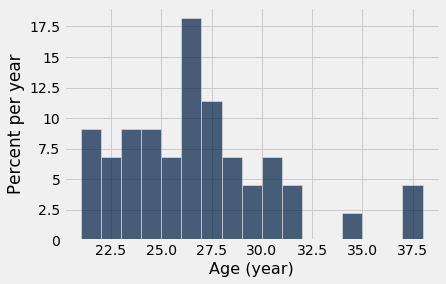

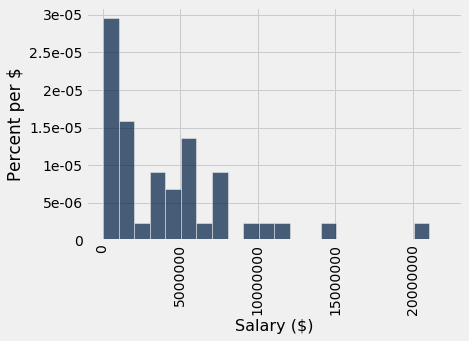

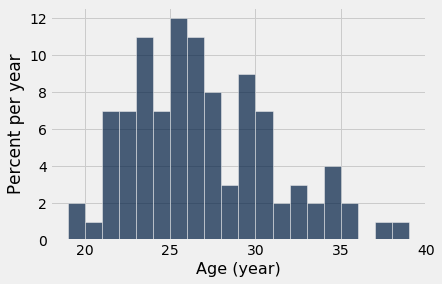

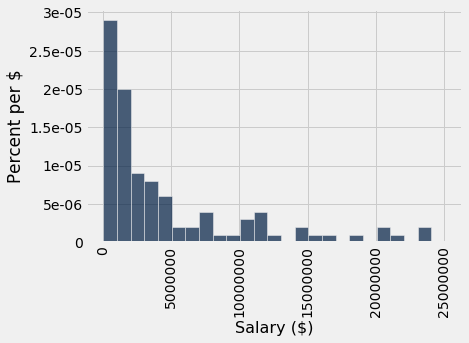

In [19]:
# Original:
small_srswor_data = load_data("small_srswor_salary.csv")
small_stats = compute_statistics(small_srswor_data)
large_srswor_data = load_data("large_srswor_salary.csv")
large_stats = compute_statistics(large_srswor_data)
print('Full data stats:                 ', full_stats)
print('Small simple random sample stats:', small_stats)
print('Large simple random sample stats:', large_stats)

### 4. Producing simple random samples


array([2.69318182e+01, 4.57861155e+06])

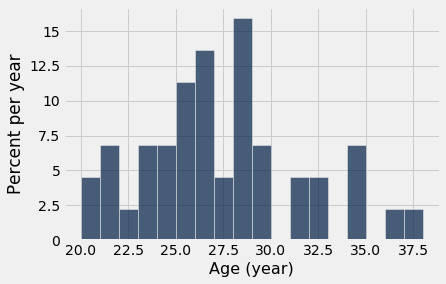

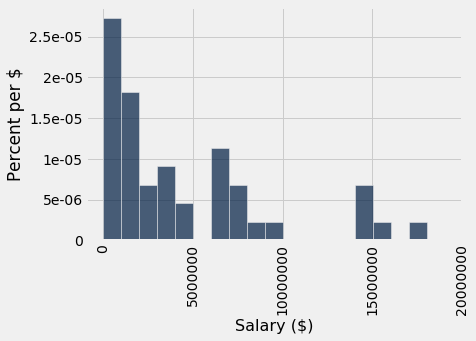

In [20]:
my_small_srswor_data = full_data.sample(44, with_replacement = False)
my_small_stats = compute_statistics(my_small_srswor_data)
my_small_stats

array([2.70800000e+01, 4.45485556e+06])

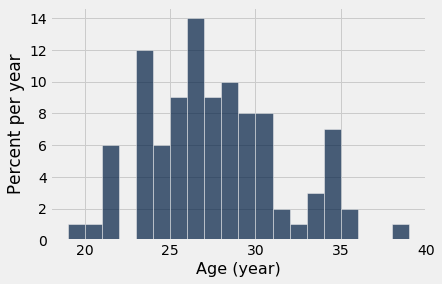

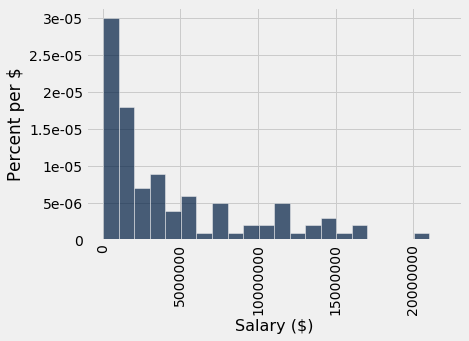

In [21]:
my_large_srswor_data = full_data.sample(100, with_replacement = False)
my_large_stats = compute_statistics(my_large_srswor_data)
my_large_stats

The average and histogram statistics seem to change less across samples of this size. They are closer to their true values, which is what we'd expect to see because we are sampling a larger subset of the population. 